In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('C:/Users/user/Desktop/데이터분석 스터디/titanic/train.csv')
test = pd.read_csv('C:/Users/user/Desktop/데이터분석 스터디/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 데이터분석
## 1. Pclass 

In [10]:
# 각 class에 몇명이 있었는지
train[['Pclass','Survived']].groupby(['Pclass']).count().rename(columns={'Survived':'Passenger'})

,Passenger
Pclass,
1,216
2,184
3,491


In [11]:
# class 별로 생존한 사람이 몇명인지
train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [12]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


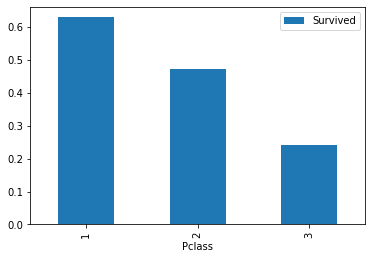

In [13]:
# mean() -> 생존율
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

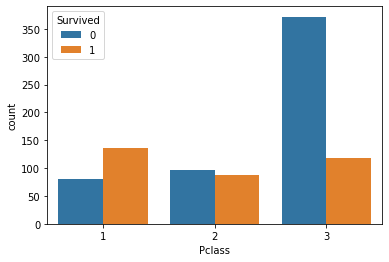

In [14]:
sns.countplot('Pclass', hue='Survived', data=train)

## 2. Sex

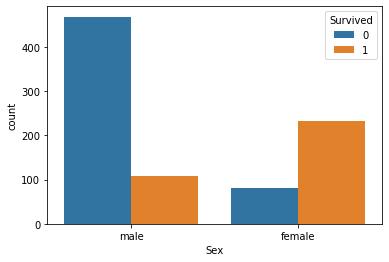

In [15]:
sns.countplot('Sex', hue='Survived', data=train)

In [16]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [17]:
pd.crosstab(train['Sex'], train['Survived'], margins='True')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 3. Age

In [18]:
train['Age'].max()

80.0

In [19]:
train['Age'].min()

0.42

In [20]:
train['Age'].mean()

29.69911764705882

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


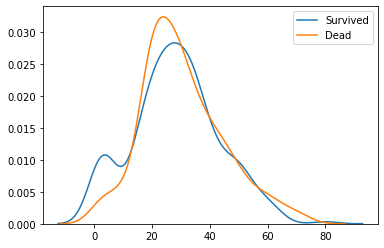

In [21]:
sns.kdeplot(train[train['Survived']==1]['Age'])
sns.kdeplot(train[train['Survived']==0]['Age'])
plt.legend(['Survived', 'Dead'])

## 4.Embarked

In [22]:
train[['Embarked','Survived']].groupby(['Embarked']).count().rename(columns={'Survived':'Passenger'})

,Passenger
Embarked,
C,168
Q,77
S,644


In [23]:
train[['Embarked','Survived']].groupby(['Embarked']).sum()

,Survived
Embarked,
C,93
Q,30
S,217


In [24]:
pd.crosstab(train['Embarked'], train['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [25]:
train[['Embarked','Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


# Feature Engineering

In [26]:
train['Age'].isnull().sum()

177

In [27]:
# data를 string으로 바꿔주는 str, 정규표현식을 적용해주는 extract
train['Title']=train['Name'].str.extract('([A-Za-z]+)\.')
test['Title']=train['Name'].str.extract('([A-Za-z]+)\.')

In [28]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Capt          1
Ms            1
Don           1
Lady          1
Jonkheer      1
Countess      1
Mme           1
Name: Title, dtype: int64

In [29]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [32]:
train['Title'].replace(['Sir','Rev','Ms','Mme','Major','Lady','Jonkheer','Dr','Don','Countless','Col','Capt'],
['Mr','Mr','Miss','Miss','Mr','Miss','Mr','Mr','Mr','Mrs','Mr','Mr'], inplace = True)

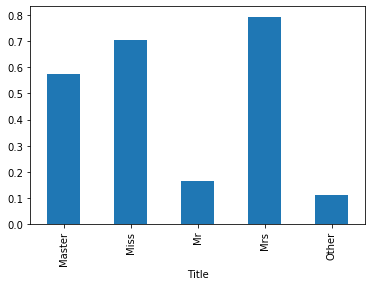

In [33]:
train['Survived'].groupby(train['Title']).mean().plot.bar()

In [35]:
train.groupby('Title').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.798677,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


In [34]:
train.loc[(train.Age.isnull())&(train.Title=='Mr'), 'Age'] = 33
train.loc[(train.Age.isnull())&(train.Title=='Mrs'),'Age'] = 36
train.loc[(train.Age.isnull())&(train.Title=='Master'),'Age'] = 5
train.loc[(train.Age.isnull())&(train.Title=='Miss'),'Age'] = 22
train.loc[(train.Age.isnull())&(train.Title=='Other'),'Age'] = 46

In [36]:
test.loc[(train.Age.isnull())&(train.Title=='Mr'), 'Age'] = 33
test.loc[(train.Age.isnull())&(train.Title=='Master'),'Age'] = 5
test.loc[(train.Age.isnull())&(train.Title=='Miss'),'Age'] = 22
test.loc[(train.Age.isnull())&(train.Title=='Other'),'Age'] = 46

In [37]:
train['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [38]:
train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)
test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)

In [39]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,male,22.0,7.2500,S,Mr
1,1,1,female,38.0,71.2833,C,Mrs
2,1,3,female,26.0,7.9250,S,Miss
3,1,1,female,35.0,53.1000,S,Mrs
4,0,3,male,35.0,8.0500,S,Mr


In [40]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title
0,3,male,34.5,7.8292,Q,Mr
1,3,female,47.0,7.0000,S,Mrs
2,2,male,62.0,9.6875,Q,Miss
3,3,male,27.0,8.6625,S,Mrs
4,3,female,22.0,12.2875,S,Mr


## 수치화

## 머신러닝 모델

In [41]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics # 모델의 평가
from sklearn.model_selection import train_test_split # training set을 쉽게 나눠주는 함수

In [42]:
X_train = train.drop('Survived', axis=1).values
# X_train에 'Survived' Column을 제외한 나머지들을 전부 values로 집어 넣는 것입니다.
# values를 처리하면 array 형태로 변환됩니다.
target_label = train['Survived'].values
# target_label에 'Survived' values의 값만 넣는 것입니다.
X_test = test.values

In [45]:
# ?
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [46]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'male'